# Classification problem. Predict "Maker Location"

In [1]:
import h2o
import h2o.grid
import matplotlib.pyplot as plt
import numpy as np

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.211-b12, mixed mode)
  Starting server from C:\Users\malbalawi\AppData\Roaming\Python\Python37\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\malbalawi\AppData\Local\Temp\3\tmpiwedcn56
  JVM stdout: C:\Users\malbalawi\AppData\Local\Temp\3\tmpiwedcn56\h2o_malbalawi_started_from_python.out
  JVM stderr: C:\Users\malbalawi\AppData\Local\Temp\3\tmpiwedcn56\h2o_malbalawi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,07 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.4
H2O cluster version age:,1 month and 7 days
H2O cluster name:,H2O_from_python_malbalawi_s23lbk
H2O cluster total nodes:,1
H2O cluster free memory:,1.653 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


# STEP 1 : load data set and split it

In [3]:
data=h2o.import_file("http://coursera.h2o.ai/cacao.882.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
train,valid,test = data.split_frame([0.8,0.1], seed=70)

In [5]:
print("%d/%d/%d" % (train.nrows,valid.nrows,test.nrows))

1431/188/176


In [6]:
data.summary()

,Maker,Origin,REF,Review Date,Cocoa Percent,Maker Location,Rating,Bean Type,Bean Origin
type,enum,enum,int,int,real,enum,real,enum,enum
mins,,,5.0,2006.0,0.42,,1.0,,
mean,,,1035.9047353760463,2012.325348189414,0.7169832869080772,,3.185933147632313,,
maxs,,,1952.0,2017.0,1.0,,5.0,,
sigma,,,552.8863650101442,2.92721027766861,0.0632311833842919,,0.4780623935863306,,
zeros,,,0,0,0,,0,,
missing,0,0,0,0,0,0,0,1,1
0,A. Morin,Agua Grande,1876.0,2016.0,0.63,France,3.75,Â,Sao Tome
1,A. Morin,Kpime,1676.0,2015.0,0.7,France,2.75,Â,Togo
2,A. Morin,Atsane,1676.0,2015.0,0.7,France,3.0,Â,Togo


# STEP 2 : Start creat the Model and  set x to be the list of columns I will use to train on. 

In [7]:
y="Maker Location"
ignoreFields= [ "Maker","Origin"
   
]
xAll=[i for i in train.names if i not in ignoreFields] #indpendent Varilbles


In [8]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [9]:
m_def= H2ODeepLearningEstimator()
%time m_def.train(xAll,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 10.9 s


In [10]:
m_def.model_performance(test)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.5375629122809482
RMSE: 0.7331868194948326
LogLoss: 2.4057354403303717
Mean Per-Class Error: 0.4729202279202279
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Amsterdam,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Domincan Republic,Ecuador,Eucador,Fiji,Finland,France,Germany,Ghana,Grenada,Guatemala,Honduras,Hungary,Iceland,India,Ireland,Israel,Italy,Japan,Lithuania,Madagascar,Martinique,Mexico,Netherlands,New Zealand,Niacragua,Nicaragua,Peru,Philippines,Poland,Portugal,Puerto Rico,Russia,Sao Tome,Scotland,Singapore,South Africa,South Korea,Spain,St. Lucia,Suriname,Sweden,Switzerland,U.K.,U.S.A.,Venezuela,Vietnam,Wales,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,6 / 6
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,4 / 4
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2 / 2
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.2307692,18 / 78
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.4204545
2,0.5965909
3,0.6818181
4,0.7272727
5,0.7613636
6,0.8068182
7,0.8125
8,0.8465909
9,0.8522728
10,0.8920455


In [11]:
m_def

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1562435106295_1


ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.5263514267384005
RMSE: 0.7255008109839716
LogLoss: 2.092546398218858
Mean Per-Class Error: 0.899789471694506
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Amsterdam,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Domincan Republic,Ecuador,Eucador,Fiji,Finland,France,Germany,Ghana,Grenada,Guatemala,Honduras,Hungary,Iceland,India,Ireland,Israel,Italy,Japan,Lithuania,Madagascar,Martinique,Mexico,Netherlands,New Zealand,Niacragua,Nicaragua,Peru,Philippines,Poland,Portugal,Puerto Rico,Russia,Sao Tome,Scotland,Singapore,South Africa,South Korea,Spain,St. Lucia,Suriname,Sweden,Switzerland,U.K.,U.S.A.,Venezuela,Vietnam,Wales,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,7 / 7
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,1.0,43 / 43
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,1.0,20 / 20
0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,14.0,0.0,0.0,0.0,0.8484848,28 / 33
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,495.0,0.0,0.0,0.0,0.175,105 / 600
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,20 / 20
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10 / 10
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1 / 1



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.4402516
2,0.5779175
3,0.7044025
4,0.7721873
5,0.8232006
6,0.8581412
7,0.8832984
8,0.9000699
9,0.9175402
10,0.9343117



ModelMetricsMultinomial: deeplearning
** Reported on validation data. **

MSE: 0.5160062400462369
RMSE: 0.7183357432609329
LogLoss: 2.3243256474589904
Mean Per-Class Error: 0.48766543085046626
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Amsterdam,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Domincan Republic,Ecuador,Eucador,Fiji,Finland,France,Germany,Ghana,Grenada,Guatemala,Honduras,Hungary,Iceland,India,Ireland,Israel,Italy,Japan,Lithuania,Madagascar,Martinique,Mexico,Netherlands,New Zealand,Niacragua,Nicaragua,Peru,Philippines,Poland,Portugal,Puerto Rico,Russia,Sao Tome,Scotland,Singapore,South Africa,South Korea,Spain,St. Lucia,Suriname,Sweden,Switzerland,U.K.,U.S.A.,Venezuela,Vietnam,Wales,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,5 / 5
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,0.1744186,15 / 86
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.4680851
2,0.6170213
3,0.6755319
4,0.7234043
5,0.7553192
6,0.7712767
7,0.8138298
8,0.8457447
9,0.8617022
10,0.8829788


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_classification_error
,2019-07-06 13:16:38,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan
,2019-07-06 13:16:39,2.195 sec,1115 obs/sec,1.0,1,1431.0,0.8115158,3.7383406,0.9984868,0.6904263,0.7881575,3.4060285,0.9984558,0.6595745
,2019-07-06 13:16:45,7.341 sec,1607 obs/sec,7.0,7,10017.0,0.7391772,2.4820503,0.9987446,0.5772187,0.7303528,2.6279584,0.9986740,0.5478723
,2019-07-06 13:16:47,9.904 sec,1663 obs/sec,10.0,10,14310.0,0.7255008,2.0925464,0.9987906,0.5597484,0.7183357,2.3243256,0.9987173,0.5319149


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Bean Origin.Guatemala,1.0,1.0,0.0083320
Bean Origin.Brazil,0.9915442,0.9915442,0.0082616
Bean Origin.Colombia,0.9902051,0.9902051,0.0082504
Bean Origin.Peru,0.9805080,0.9805080,0.0081696
Bean Origin.Vietnam,0.9613717,0.9613717,0.0080102
---,---,---,---
"Bean Origin.Ven.,Ecu.,Peru,Nic.",0.7395869,0.7395869,0.0061623
Bean Type.Nacional,0.7111814,0.7111814,0.0059256
Rating,0.6210456,0.6210456,0.0051746
Cocoa Percent,0.6082119,0.6082119,0.0050677



See the whole table with table.as_data_frame()


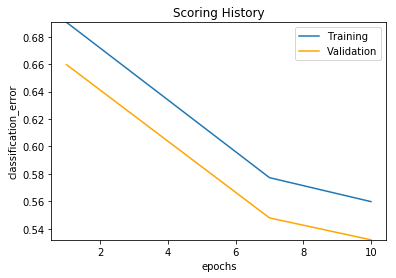

In [12]:
m_def.plot()